# **CAPSTONE PROJECT** - Target customer prediction

## PART 1 - DATA AGGRETATION - CAMPAIGNS & PRODUCTS

By Chau Tran


## TABLE OF CONTENTS<a id="top1"></a>

* [Load libraries and data](#data1)
* [Aggregate full details of all campaigns](#campaign)
* [Most puchased categories and products](#topCategoriesProducts)
* [Transactions of promoted products in camp18 ](#camp18ProductTransactions)
* [A look into transaction time vs revenue](#transactionTime)


### Load libraries and data<a id="data1"></a>
[Back to top](#top1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
dir_path = 'Kroger_Retail_Dunnhumby/'

file1= 'transaction_data.csv'
file2 = 'hh_demographic.csv'
file3 = 'coupon_redempt.csv'
file4= 'coupon.csv'
file5 = 'campaign_desc.csv'
file6 = 'campaign_table.csv'
file7= 'causal_data.csv'
file8 = 'product.csv'


In [3]:
def load_data(filename):
    df = pd.read_csv(dir_path + filename)
    df.columns = df.columns.str.lower()
    return df


In [4]:
# import data listings into dataframe
df_trans = load_data(file1)
df_trans.head()


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [5]:
df_coupon_redempt = load_data(file3)
df_coupon_redempt.shape

(2318, 4)

In [6]:
df_coupon = load_data(file4)
df_coupon.head()

,coupon_upc,product_id,campaign
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [7]:
df_camp_des = load_data(file5)
df_camp_des.head()

,description,campaign,start_day,end_day
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [8]:
df_camp_cus = load_data(file6)
df_camp_cus.head()

,description,household_key,campaign
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [9]:
df_prod = load_data(file8)
df_prod.head()

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


### Generate full campaign description table<a id="campaign"></a>
[Back to top](#top1)

In [10]:
df_camp_des['duration'] = df_camp_des.end_day - df_camp_des.start_day

In [11]:
total_coupons = df_coupon.groupby(['campaign','coupon_upc']).count().reset_index()
total_coupons = total_coupons[['campaign','coupon_upc']].groupby('campaign').count().reset_index()
total_coupons = total_coupons.rename(columns={'coupon_upc':'total_coupons'})
total_coupons.total_coupons.sum()

1397

In [12]:
# generate full campaign description table
df_camp_des = df_camp_des.merge(total_coupons,how='left',on='campaign')
df_camp_des['coupons_giveout'] = df_camp_des['total_coupons']
df_camp_des.loc[df_camp_des.description=='TypeA','coupons_giveout'] = 16

df_camp_des = df_camp_des.sort_values('start_day')
df_camp_des.to_csv('DATA_CLEAN/campaign_details.csv',index=False)
df_camp_des

,description,campaign,start_day,end_day,duration,total_coupons,coupons_giveout
29,TypeA,26,224,264,40,181,16
28,TypeC,27,237,300,63,27,27
27,TypeB,28,259,320,61,28,28
26,TypeB,29,281,334,53,33,33
25,TypeA,30,323,369,46,181,16
23,TypeB,1,346,383,37,11,11
24,TypeB,2,351,383,32,16,16
20,TypeC,3,356,412,56,34,34
22,TypeB,4,372,404,32,12,12
21,TypeB,5,377,411,34,11,11


### Find out most purchased categories and products<a id="topCategoriesProducts"></a>
[Back to top](#top1)

In [13]:
# get list of promoted products

arr_promoted_prod = df_coupon.product_id.unique()
arr_promoted_prod

df_promoted_prod = df_prod[df_prod.product_id.isin(arr_promoted_prod)]
df_promoted_prod

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
7,26601,69,DRUG GM,Private,VITAMINS,VITAMIN - MINERALS,300CT(1)
10,26738,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
12,26941,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
...,...,...,...,...,...,...,...
92162,18056453,1378,NUTRITION,National,DRIED FRUIT,DRIED FRUIT - OTHER,.71 OZ
92181,18104791,2489,FLORAL,National,FLORAL-FRESH CUT,CARNATIONS,8 STEM
92191,18105264,6082,PRODUCE,National,BERRIES,BLACKBERRIES,1/2 PT
92248,18122531,2296,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,22.5 OZ


In [14]:
# get most popular product departments promoted

df_promoted_prod.department.nunique()
df_promoted_prod.department.unique()
# df_promoted_prod.shape

df_promoted_prod_qty = df_promoted_prod.groupby('department').product_id.count().reset_index()
df_promoted_prod_qty = df_promoted_prod_qty.sort_values('product_id',ascending=False)
df_promoted_prod_qty.head(10)

,department,product_id
11,GROCERY,16800
5,DRUG GM,13224
1,COSMETICS,2921
22,PRODUCE,2883
13,MEAT,2534
14,MEAT-PCKGD,2373
6,FLORAL,916
17,NUTRITION,910
27,SEAFOOD-PCKGD,553
26,SEAFOOD,369


In [15]:
# get most popular product departments

arr_trans_prod = df_trans.product_id.unique()
print(f'All prods purchased by 2500 cus: {len(arr_trans_prod)}')

df_trans_prod = df_prod[df_prod.product_id.isin(arr_trans_prod)]
df_trans_prod

df_trans_prod_qty = df_trans_prod.groupby('department').product_id.count().reset_index()
df_trans_prod_qty = df_trans_prod_qty.sort_values('product_id',ascending=False)
df_trans_prod_qty.head(10)

All prods purchased by 2500 cus: 92339


,department,product_id
17,GROCERY,39019
10,DRUG GM,31523
33,PRODUCE,3117
5,COSMETICS,3007
26,NUTRITION,2913
21,MEAT,2544
22,MEAT-PCKGD,2427
8,DELI,2354
27,PASTRY,2149
12,FLORAL,938


In [16]:
# Find out what product each customer purchase most often

df_max_prod_qty =  df_trans.groupby(['household_key','product_id']).quantity.count().reset_index()
df_max_prod_qty = df_max_prod_qty.sort_values('quantity',ascending=False).groupby(['household_key']).first().reset_index()
df_max_prod_qty = df_max_prod_qty.merge(df_prod[['product_id','department','commodity_desc','sub_commodity_desc']],on='product_id')
df_max_prod_qty.department.unique()


array(['GROCERY', 'DELI', 'PRODUCE', 'KIOSK-GAS', 'DRUG GM', 'SALAD BAR',
       'MEAT', 'NUTRITION', ' ', 'PASTRY', 'MISC SALES TRAN',
       'MEAT-PCKGD', 'SPIRITS', 'SEAFOOD', 'COSMETICS', 'COUP/STR & MFG',
       'SEAFOOD-PCKGD', 'MISC. TRANS.'], dtype=object)

In [17]:
df_max_prod_qty.head()

,household_key,product_id,quantity,department,commodity_desc,sub_commodity_desc
0,1,856942,52,GROCERY,BAKED BREAD/BUNS/ROLLS,FRUIT/BREAKFAST BREAD
1,2,1133018,9,GROCERY,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
2,111,1133018,8,GROCERY,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
3,116,1133018,15,GROCERY,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
4,147,1133018,18,GROCERY,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY


In [115]:
df_max_prod_qty[df_max_prod_qty.department=='SALAD BAR'].sample(10)

,household_key,product_id,quantity,department,commodity_desc,sub_commodity_desc
1854,683,279994,4,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1085,378,1005186,110,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1782,762,1091365,111,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1095,1228,1005186,118,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1089,976,1005186,32,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1783,1377,1091365,9,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
2169,1386,1108429,4,SALAD BAR,SALAD BAR,CONDIMENTS/SUPPLIES
1784,1994,1091365,9,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1781,579,1091365,8,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT
1088,822,1005186,14,SALAD BAR,SALAD BAR,SALAD BAR FRESH FRUIT


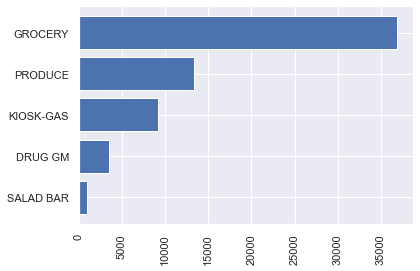

In [18]:
top_prod_plot = df_max_prod_qty.groupby('department').agg({'quantity':'sum'}).sort_values('quantity',ascending=True).quantity.nlargest(5)
top_prod_plot_df = pd.DataFrame(top_prod_plot.items(), columns=['category', 'qty']).sort_values('qty',ascending=True)

# plot the top 5 categories
plt.barh(top_prod_plot_df.category, top_prod_plot_df.qty)
plt.xticks(rotation=90)
plt.show()


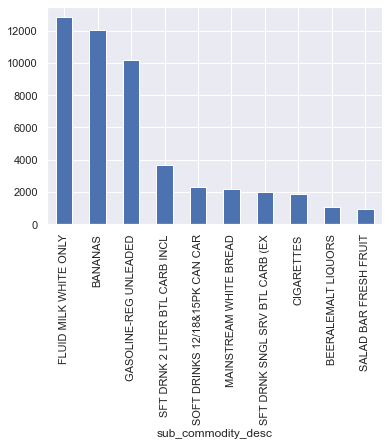

In [19]:
df_max_prod_qty.groupby('sub_commodity_desc').agg({'quantity':'sum'}).sort_values('quantity',ascending=False).quantity.nlargest(10).plot.bar()
plt.xticks(rotation=90)
plt.show()


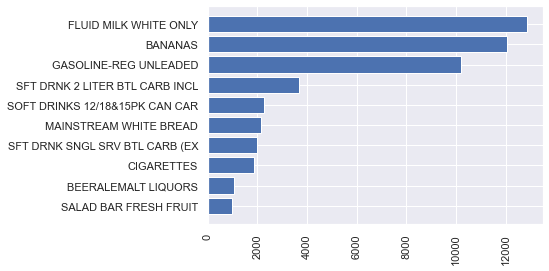

In [20]:
prod_plot = df_max_prod_qty.groupby('sub_commodity_desc').agg({'quantity':'sum'}).sort_values('quantity',ascending=True).quantity.nlargest(10)
prod_plot_df = pd.DataFrame(prod_plot.items(), columns=['category', 'qty']).sort_values('qty',ascending=True)
prod_plot_df

# plot the categories
plt.barh(prod_plot_df.category, prod_plot_df.qty)
plt.xticks(rotation=90)
plt.show()


In [21]:
df_max_prod_qty.commodity_desc.nunique()

147

In [22]:
# Get sale amounts on transaction with loyalty discounts and coupon discounts

discount_trans = df_trans.query('retail_disc!=0 or coupon_disc!=0 or coupon_match_disc!=0')
discount_trans1 = df_trans.query('retail_disc!=0')
discount_trans2 = df_trans.query('coupon_disc!=0 or coupon_match_disc!=0')

a_sale = round(discount_trans.sales_value.sum(),2)
a1_dis = round(discount_trans1.retail_disc.sum(),2)
a1_sale = round(discount_trans1.sales_value.sum(),2)
a2_dis = round(discount_trans2.coupon_disc.sum(),2)
a2_sale = round(discount_trans2.sales_value.sum(),2)

print(f'basket with discount {discount_trans.basket_id.nunique()}')
print(f'basket with loyal card discount {discount_trans1.basket_id.nunique()}, total sale {a1_sale}, total discount amount {a1_dis}, ratio {a1_dis/a1_sale}')
print(f'basket with coupon discount {discount_trans2.basket_id.nunique()}, total sale {a2_sale}, total discount amount {a2_dis}, ratio {a2_dis/a2_sale}')
print(f'total basket {df_trans.basket_id.nunique()}, total sale {a_sale}')

basket with discount 231045
basket with loyal card discount 230562, total sale 4056112.59, total discount amount -1398334.84, ratio -0.3447475406495065
basket with coupon discount 16751, total sale 127404.69, total discount amount -42611.54, ratio -0.3344581741849535
total basket 276484, total sale 4108963.23


### Get all transactions related to promoted products in focus camp (campA 18)<a id="camp18ProductTransactions"></a>
[Back to top](#top1)

In [23]:
# get all products promoted by campA 18

prod_id_camp18 = df_coupon.query('campaign==18').product_id.unique()

In [24]:
len(prod_id_camp18)

35513

In [25]:
df_trans_during_camp18 = df_trans[(df_trans.day>=587) & (df_trans.day<=642)]

df_promoted_prod_trans = df_trans_during_camp18[df_trans_during_camp18.product_id.isin(prod_id_camp18)]
df_promoted_prod_trans


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
2075143,2070,40533072090,587,8288358,1,0.89,311,0.00,28,85,0.0,0.0
2077704,1346,40544586146,587,564891,2,5.00,208,-1.98,1230,85,0.0,0.0
2077705,1346,40544586146,587,614196,1,5.49,208,-1.00,1230,85,0.0,0.0
2077708,1346,40544586146,587,687292,1,6.56,208,0.00,1230,85,0.0,0.0
2077709,1346,40544586146,587,740961,1,2.49,208,0.00,1230,85,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2314980,36,41400725537,642,5564901,1,5.49,320,-0.80,1022,92,0.0,0.0
2314981,36,41400725537,642,5587133,10,4.00,320,0.00,1022,92,0.0,0.0
2314988,77,41400727886,642,908064,1,2.00,320,-1.29,1625,92,0.0,0.0
2314989,77,41400727886,642,10457110,1,2.00,320,-1.29,1625,92,0.0,0.0


In [26]:
df_promoted_prod_trans.to_csv('DATA_CLEAN/transactions_of_campA18_products.csv',index=False)

### A look into transaction time vs revenue<a id="transactionTime"></a>
[Back to top](#top1)

In [27]:
full_trans_time = df_trans.groupby('trans_time').agg({'sales_value':'sum','basket_id':'count'}).reset_index()
full_trans_time.rename(columns={'basket_id':'total_items'},inplace=True)

In [28]:
full_trans_time.sort_values('total_items', ascending=False)

,trans_time,sales_value,total_items
1064,1744,15345.15,5204
1038,1718,15215.73,5198
1116,1836,15247.08,5172
1073,1753,15510.23,5134
1044,1724,15624.95,5104
...,...,...,...
284,444,29.10,7
312,512,21.21,7
325,525,32.29,7
279,439,22.44,7


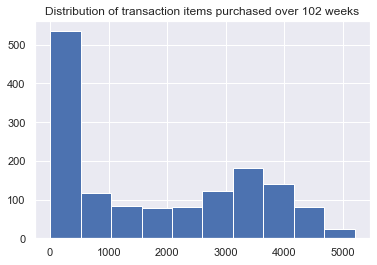

In [31]:
plt.title('Distribution of transaction items purchased over 102 weeks')
plt.hist(full_trans_time.total_items)
plt.show()

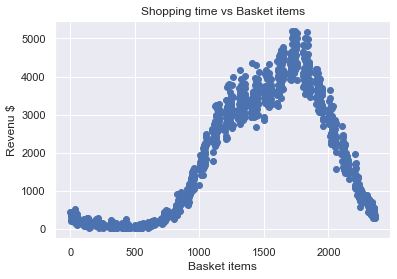

In [41]:
plt.title('Shopping time vs Basket items')
plt.scatter(full_trans_time.trans_time, full_trans_time.total_items)
plt.xlabel('Basket items')
plt.ylabel('Revenu $')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

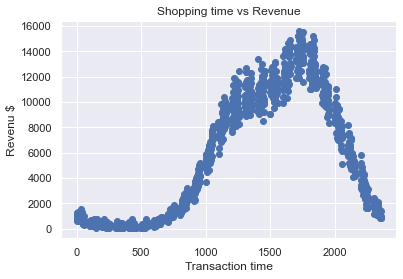

In [42]:
plt.title('Shopping time vs Revenue')
plt.scatter(full_trans_time.trans_time, full_trans_time.sales_value)
plt.xlabel('Transaction time')
plt.ylabel('Revenu $')
plt.show

In [34]:
hh_time = df_trans.groupby(['household_key','trans_time']).agg({'sales_value':'sum','basket_id':'count'}).sort_values(['household_key','sales_value'],ascending=False).reset_index()
hh_time.rename(columns={'basket_id':'total_items'},inplace=True)
hh_time = hh_time.drop_duplicates(subset='household_key',keep='first')
hh_time.rename(columns={'trans_time':'purchase_most_trans_time'},inplace=True)
hh_time

,household_key,purchase_most_trans_time,sales_value,total_items
0,2500,1927,175.62,50
105,2499,1347,290.10,110
191,2498,2122,166.35,51
342,2497,1523,293.32,79
531,2496,1951,201.44,64
...,...,...,...,...
233453,5,1855,60.43,21
233491,4,1452,126.24,38
233520,3,1909,286.26,72
233567,2,2011,153.56,57


In [35]:
hh_time.describe()

,household_key,purchase_most_trans_time,sales_value,total_items
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,1250.50000,1570.085200,158.651776,49.035200
std,721.83216,404.511685,96.413959,31.676466
min,1.00000,7.000000,8.170000,1.000000
25%,625.75000,1315.750000,92.007500,26.000000
50%,1250.50000,1617.000000,141.665000,45.000000
75%,1875.25000,1854.000000,205.057500,66.000000
max,2500.00000,2359.000000,961.490000,228.000000


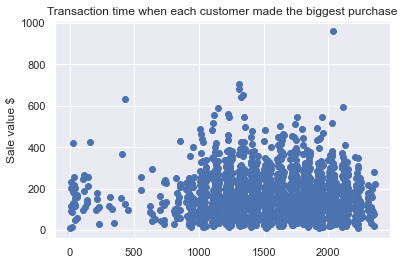

In [43]:
plt.title('Transaction time when each customer made the biggest purchase')
plt.scatter(hh_time.purchase_most_trans_time, hh_time.sales_value)
plt.ylabel('Sale value $')
plt.show()

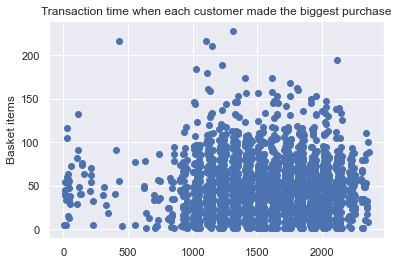

In [44]:
plt.title('Transaction time when each customer made the biggest purchase')
plt.scatter(hh_time.purchase_most_trans_time, hh_time.total_items)
plt.ylabel('Basket items')
plt.show()